import package yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ambil data

In [2]:
house = pd.read_csv('data/kc_house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


cek info datanya

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


**id** :
a notation for a house, id dari rumahnya

**date** :
Date house was sold, tanggal rumah terjual

**price** :
**Price is prediction target** , **harga yang jadi target prediksi**

**bedrooms** :
Number of Bedrooms/House, nomor kamar tidur

**bathrooms** :
Number of bathrooms/House, nomor kamar mandi

**sqft_living** :
square footage of the home,  

**sqft_lot** :
square footage of the lot

**floors** :
Total floors (levels) in house

**waterfront** :
House which has a view to a waterfront

**view** :
Has been viewed

**condition** :
How good the condition is ( Overall )

**grade** :
overall grade given to the housing unit, based on King County grading system

**sqft_above** :
square footage of house apart from basement

**sqft_basement** :
square footage of the basement

**yr_built** :
Built Year

**yr_renovated** :
Year when house was renovated

**zipcode** :
zip

**lat** :
Latitude coordinate

**long** :
Longitude coordinate

**sqft_living15** :
Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

**sqft_lot15** :
lotSize area in 2015(implies-- some renovations)

cari variabel yang kolerasinya kuat

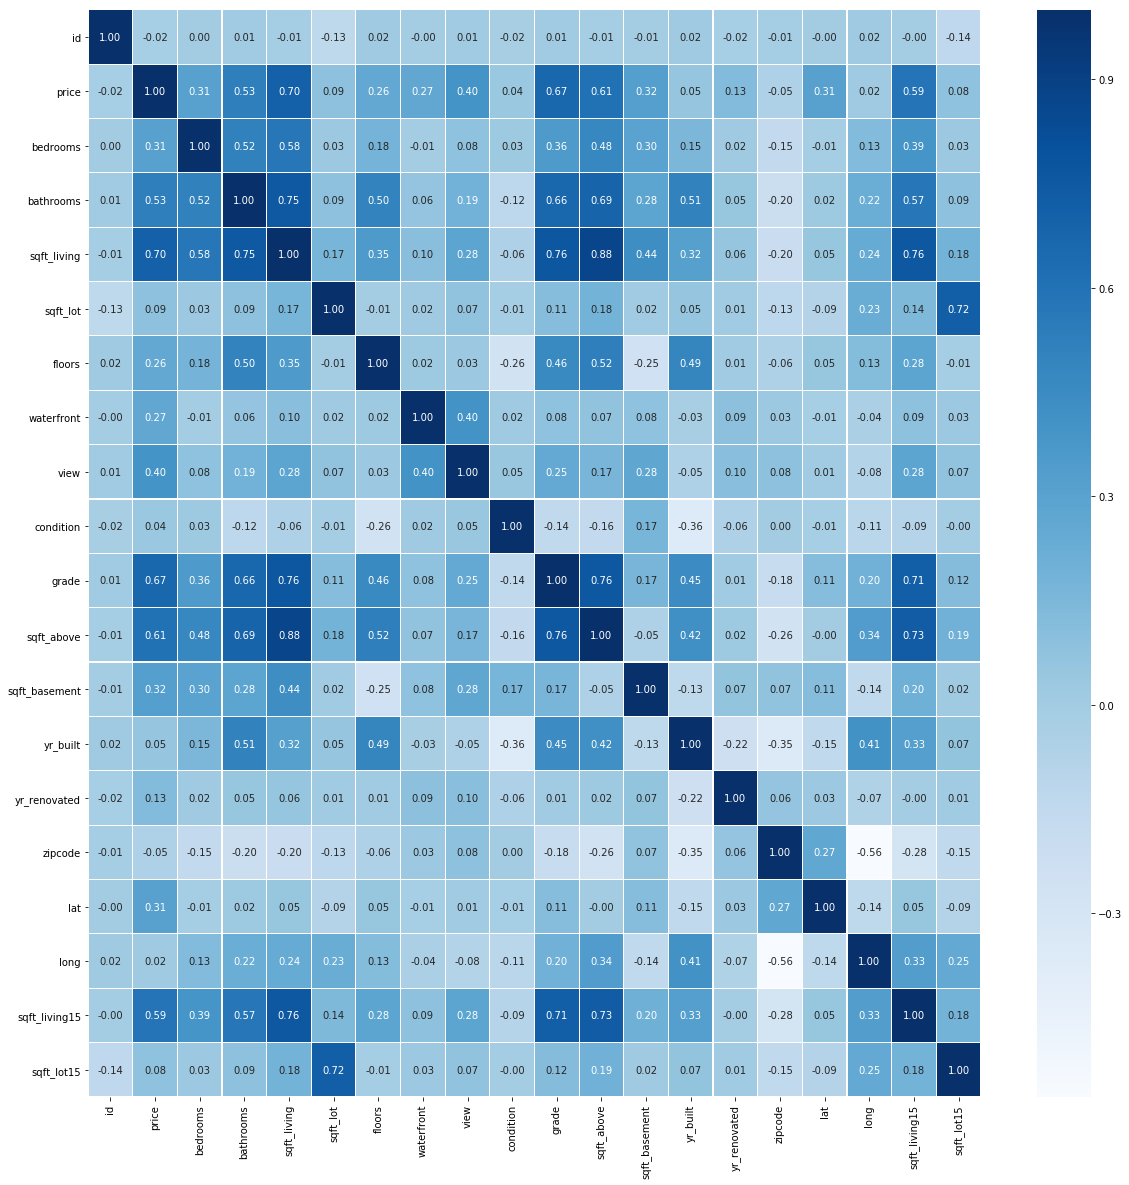

In [4]:
plt.figure(figsize=(20,20))  # to get size of your plot, you can change with any numbers
sns.heatmap(house.corr(), # data yang mau di plot
            annot=True, # do you want to get value instead of just color?
            linewidths=.10, # line between each box
            fmt= '.2f', # berapa banyak 0 di belakang koma (f buat bilangan desimal)
            cmap='Blues'); # color map

dalam kasus ini, ingin memprediksi harga rumah berdasarkan variabel yang kolerasinya kuat, sehingga variabel tersebut memiliki pengaruh kuat terhadap harga rumah tersebut
<ul>
    <li>sqft_living, square footage (ukuran panjang) of the home</li>
    <li>grade, overall grade given to the housing unit </li>
    <li>sqft_above, square footage of house apart from basement</li>
</ul>
jadi, harga rumah dipengaruhi oleh ukuran ruang tamu, grade dari rumahmya, dan house apart dari basementnya

SINGLE LINEAR REGRESSION

pada kasus ini, memprediksi rumah berdasarkan ukuran ruang tamu

tentuin target (X) dan fitur (y) nya

In [5]:
# data target (X)
X = house[['sqft_living']]
# data fitur (Y)
y = house['price']

bagi data train dan testnya

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

cari tahu shape nya

In [7]:
# Data Training
print('Shape dari Data Training :',X_train.shape)
# Data Testing
print('Shape dari Data Testing :',X_test.shape)

Shape dari Data Training : (17290, 1)
Shape dari Data Testing : (4323, 1)


fitting data train dengan linear regression

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

evaluasi data training

In [9]:
print("Nilai Evaluasi dari Data Training :", lr.score(X_train, y_train))

Nilai Evaluasi dari Data Training : 0.49391505998123586


prediksi 

In [10]:
pred = lr.predict(X_test)
pred

array([718594.41702294, 388299.91715548, 721417.44693633, ...,
       650841.69910141, 343131.43854113, 927498.63061432])

akurasi data testing

In [11]:
print("Akurasi dari Data Testing :", lr.score(X_test, y_test))

Akurasi dari Data Testing : 0.488544283596608


mengecek seberapa besar errornya dengan menggunakan Mean Squared Error

In [12]:
from sklearn.metrics import mean_squared_error

print("Mean Squared Error dari Testing Data :", mean_squared_error(y_test, pred))

Mean Squared Error dari Testing Data : 69524688106.66498


visualisasi data

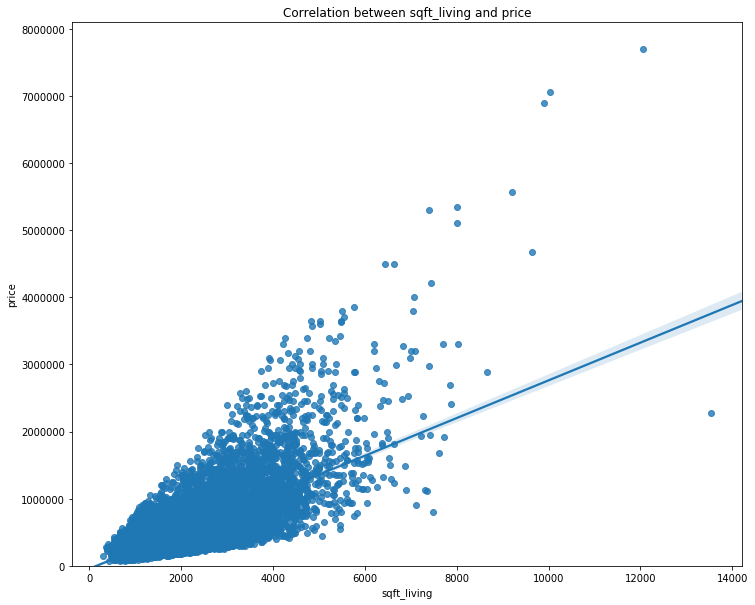

In [13]:
# lebar
width = 12
# tinggi
height = 10
# plot
plt.figure(figsize=(width, height))
# replot(<sumbu_x>, <sumbu_y>, <data_yang_ditampilkan>)
sns.regplot(x="sqft_living", y="price", data=house)
plt.ylim(0,);
# judul
plt.title("Correlation between sqft_living and price");

MULTIPLE LINEAR REGRESSION

pada kasus ini memprediksi rumah berdasarkan ukuran ruang tamu, grade dari rumahmya, dan house apart dari basementnya nya

menentukan Fitur (X) dan Target (y)

In [15]:
# Fitur (X)
X = house[['sqft_living','grade','sqft_above']]
# Target (y)
y = house['price']

membagi data jadi training dan testing

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 45)

cetak shapenya

In [17]:
# Data Training
print("Shape dari Data Training :", X_train.shape)
# Data Testing
print("Shape dari Data Testing :", X_test.shape)

Shape dari Data Training : (17290, 3)
Shape dari Data Testing : (4323, 3)


fitting data training

In [18]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Evaluasi dari data training

In [19]:
print("Evaluasi dari Data Training :", lr.score(X_train, y_train))

Evaluasi dari Data Training : 0.5413547049650326


buat prediksinya

In [20]:
pred = lr.predict(X_test)

hitung akurasi dari data testingnya

In [21]:
print("Akurasi dari Data Testing :", lr.score(X_test, y_test))

Akurasi dari Data Testing : 0.539730558887483


periksa kesalahan data testing dengan Mean Squared Error

In [22]:
print("Mean Squared Error dari Data Testing :", mean_squared_error(y_test, pred))

Mean Squared Error dari Data Testing : 62566686248.82051
